In [1]:
import netCDF4 as nc4
import xarray as xr
import numpy as np
import pandas as pd
import warnings
import sys
warnings.filterwarnings('ignore')
sys.path.append('/glade/u/home/adamhb/Earth-System-Model-Tools/')
import esm_tools
from matplotlib import pyplot as plt

NameError: name 'sys' is not defined

## Paths to data

In [4]:
late20th = 'supIg105_020224-1951-2020_-17e2acb6a_FATES-5b076b69'
untreated_case = 'supIg105_020224-2015-2098_-17e2acb6a_FATES-5b076b69'
treated_case = 'supIg105_treated_041124-2015-2098-2015-2098_-17e2acb6a_FATES-1449c787'

## Fields

In [13]:
fields = [
          #have on to import these dimensions
          #'FATES_SEED_PROD_USTORY_SZ',
          'FATES_VEGC_AP',
          #patches and cohorts
          'FATES_NPATCHES',
          #'FATES_PATCHAREA_AP','FATES_CANOPYAREA_AP',
          'FATES_NCOHORTS','FATES_NPATCH_AP',
          #structure
          #'FATES_LAI_AP',
          #density
          'FATES_NPLANT_PF',
          'FATES_NPLANT_SZAPPF',
          'FATES_NPLANT_SZPF',
          'FATES_NPLANT_ACPF',
          #'FATES_NPLANT_CANOPY_SZPF',
          #'FATES_NPLANT_USTORY_SZPF',
          #basal area
          'FATES_BASALAREA_SZPF',
          #crown_area
          #'FATES_CANOPYCROWNAREA_PF',
          #'FATES_CANOPYCROWNAREA_APPF',
          #'FATES_CANOPYAREA_HT',
          #'FATES_CROWNAREA_CLLL',
          #'FATES_CROWNAREA_PF',
          #biomass
          'FATES_VEGC_PF','FATES_VEGC_AP','FATES_VEGC_ABOVEGROUND','FATES_VEGC_ABOVEGROUND_SZPF',
          #growth
          'FATES_DDBH_SZPF',
          'FATES_DDBH_CANOPY_SZAP','FATES_DDBH_USTORY_SZAP',
          #mortality
          'FATES_MORTALITY_PF',
          'FATES_MORTALITY_CANOPY_SZ',
          #'FATES_MORTALITY_USTORY_SZAP',
          'FATES_MORTALITY_BACKGROUND_SZPF','FATES_MORTALITY_HYDRAULIC_SZPF','FATES_MORTALITY_CSTARV_SZPF',
          'FATES_MORTALITY_IMPACT_SZPF',
          'FATES_MORTALITY_FIRE_SZPF','FATES_MORTALITY_CROWNSCORCH_SZPF',
          'FATES_MORTALITY_CANOPY_SZ','FATES_MORTALITY_USTORY_SZ',
          'FATES_MORTALITY_SENESCENCE_SZPF',
          #seed production and recruitment
          #'FATES_SEED_PROD_USTORY_SZ','FATES_SEED_PROD_CANOPY_SZ',
          #'FATES_SEEDS_IN',
          #'FATES_SEED_BANK',
          #'FATES_SEEDBANK_PF',
          #'FATES_SEED_ALLOC_SZPF',
          'FATES_RECRUITMENT_PF',
          #GPP and NPP
          'FATES_GPP','FATES_GPP_SZPF',
          'FATES_NPP_PF','FATES_NPP_SZPF',
          'FATES_AUTORESP_SZPF','FATES_MAINTAR_SZPF',
          #physical environment
          #Light
          # 'FATES_LAISUN_Z_CLLL','FATES_LAISHA_Z_CLLL',
          # 'FATES_LAISUN_Z_CLLLPF','FATES_LAISHA_Z_CLLLPF',
          # 'FATES_PARSUN_Z_CLLLPF','FATES_PARSHA_Z_CLLLPF',
          # 'FATES_PARPROF_DIR_CLLL','FATES_PARPROF_DIF_CLLL',
          # 'FATES_PARPROF_DIF_CLLLPF','FATES_PARPROF_DIR_CLLLPF',
          #Litter
          #'FATES_CWD_ABOVEGROUND_DC',
          #'FATES_FUEL_AMOUNT',
          #CLM
          #'QVEGT','QVEGE','QSOIL','TLAI','TBOT','RAIN','QBOT','Q2M',
          #'BTRAN',
          #H20
          'SMP',#,
          #allocation
          #'FATES_STOREC_CANOPY_SZPF','FATES_STOREC_USTORY_SZPF',
          #fire
          'FATES_BURNFRAC','FATES_IGNITIONS','FATES_FIRE_INTENSITY_BURNFRAC',
          #'FATES_FUEL_BULKD','FATES_FUEL_SAV',
           'FATES_DISTURBANCE_RATE_FIRE',
           'FATES_FUEL_AMOUNT_AP',
           'FATES_FIRE_INTENSITY_BURNFRAC_AP',
           'FATES_BURNFRAC_AP',
           'FATES_FUEL_AMOUNT_APFC',
           'FATES_FUEL_AMOUNT',
           'FATES_FDI',
           'FATES_FIRE_INTENSITY',
           'FATES_FUELCONSUMED',
           'FATES_NESTEROV_INDEX',
           'FATES_MORTALITY_CROWNSCORCH_SZPF',
           'FATES_SCORCH_HEIGHT_APPF','FATES_FUEL_MEF',
           'FATES_FUEL_EFF_MOIST','FATES_FUEL_MOISTURE_FC','FATES_ROS'
          ]

## Load data

In [58]:
untreated = esm_tools.load_fates_output_data(model_output_root='/glade/derecho/scratch/adamhb',
                                 case_name=untreated_case,years = list(range(2015,2030)),fields=fields,inst_tag='0002')

-- your data have been read in -- 


In [59]:
treated = esm_tools.load_fates_output_data(model_output_root='/glade/derecho/scratch/adamhb',
                                 case_name=treated_case,years = list(range(2015,2030)),fields=fields,inst_tag='0002')

-- your data have been read in -- 


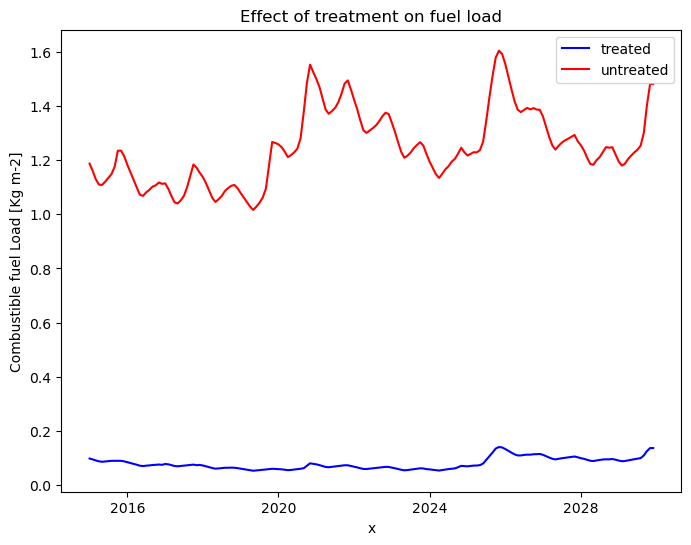

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = untreated.time

# Generate y values for two functions
y1 = esm_tools.get_combustible_fuel(treated,timeseries=True)
y2 = esm_tools.get_combustible_fuel(untreated,timeseries=True)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='treated', color='blue')  # Plot the first line
plt.plot(x, y2, label='untreated', color='red')   # Plot the second line

# Add a title and labels
plt.title('Effect of treatment on fuel load')
plt.xlabel('x')
plt.ylabel('Combustible fuel Load [Kg m-2]')

# Add a legend
plt.legend()

# Show the plot
plt.show()

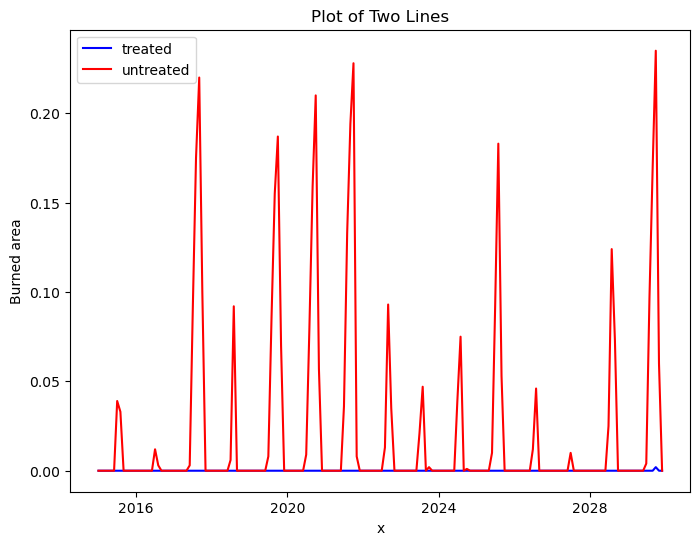

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = untreated.time

# Generate y values for two functions
y1 = esm_tools.get_mean_annual_burn_frac(treated,over_time=True)
y2 = esm_tools.get_mean_annual_burn_frac(untreated,over_time = True)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='treated', color='blue')  # Plot the first line
plt.plot(x, y2, label='untreated', color='red')   # Plot the second line

# Add a title and labels
plt.title('Plot of Two Lines')
plt.xlabel('x')
plt.ylabel('Burned area')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [68]:
# Generate y values for two functions
y1 = esm_tools.get_PHS_FLI_thresh(treated,3500)
y2 = esm_tools.get_PHS_FLI_thresh(untreated,3500)

print(y1)
print(y2)

0.0
40.0


## Total basal area

In [21]:
conifer_ba_untreated = esm_tools.get_tree_basal_area_over_time(untreated)
conifer_ba_treated = esm_tools.get_tree_basal_area_over_time(treated)
print(conifer_ba_untreated)
print(conifer_ba_treated)

[13.030307  13.021257  13.013267  13.006022  12.999166  12.991999
 12.974877  12.913799  12.788513  12.430747  12.416725  12.416377
  6.218512   6.2269635  6.24038    6.262708   6.2891264  6.3080807
  6.3080993  6.304014   6.3038726  6.2199764  6.1178656  6.120857 ]
[12.814255 12.804909 12.796286 12.788019 12.77375  12.761453 12.753457
 12.745062 12.736683 12.728044 12.719396 12.728514  8.421505  8.421485
  8.423414  8.428367  8.434394  8.437964  8.437321  8.434989  8.419769
  8.251288  8.117465  8.112869]


### GPP in 20th century

In [5]:
tags = esm_tools.inst_to_tag(np.load('/glade/work/adamhb/processed_output/supIg105_020224/old/inst_supIg105_020224.npy'))
GPP_full = []
for i in tags:
    GPP_xr = esm_tools.load_fates_output_data(model_output_root='/glade/derecho/scratch/adamhb',
                                     case_name=late20th,years = list(range(1960,2010)),fields=['FATES_GPP'],inst_tag=i)
    
    tmp = GPP_xr['FATES_GPP'].mean(dim="time").values * 3.154e+7
    GPP_full.append(tmp)

print(np.array(GPP_full).mean())
print(np.array(GPP_full).std())

-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
-- your data have been read in -- 
2.0735202439918035
0.11013172821159777
